<a href="https://colab.research.google.com/github/nailarraza/projek-yolo8/blob/main/notebooks/Training_Oli_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sel Kode 1: Instalasi Ultralytics
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [ ]:
# Sel Kode 2: Impor Library
import os
import yaml # Untuk membaca file data.yaml
from ultralytics import YOLO
from roboflow import Roboflow # Jika menggunakan API Roboflow

# Pastikan Anda sudah login ke Roboflow CLI jika menggunakan metode download via API key
!pip install roboflow
import roboflow
# roboflow.login() # Ini akan meminta API key Anda

# Ganti dengan API Key Anda dari Roboflow
# ROBOFLOW_API_KEY = "W7fTAEM92poDJZlMPGi2" # Simpan API Key dengan aman

# Jika Anda menggunakan metode download dengan API key:
rf = Roboflow(api_key="W7fTAEM92poDJZlMPGi2")
project = rf.workspace("skripro").project("oli-yolo8")
version = project.version(3)
dataset = version.download("yolov8")


# Lokasi dataset setelah diunduh (sesuaikan jika berbeda)
dataset_location = dataset.location
print(f"Dataset diunduh ke: {dataset_location}")
print(f"File YAML dataset: {os.path.join(dataset_location, 'data.yaml')}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to oli-yolo8-3 in yolov8:: 100%|██████████| 580/580 [00:00<00:00, 10485.13it/s]

Dataset diunduh ke: /content/oli-yolo8-3
File YAML dataset: /content/oli-yolo8-3/data.yaml


In [ ]:
# Sel Kode 3: Melatih Model YOLOv8

# Tentukan path ke file data.yaml Anda.
# Jika Anda menggunakan API Roboflow, path-nya adalah dataset.location + '/data.yaml'
# Jika Anda menggunakan curl, cari file data.yaml di folder hasil unzip.
# Contoh: data_yaml_path = 'Oil-Dataset-1/data.yaml' # GANTI SESUAI LOKASI ANDA

# Pastikan variabel dataset_location sudah terdefinisi dengan benar dari langkah sebelumnya
# Jika menggunakan API Roboflow:
# data_yaml_path = os.path.join(dataset.location, 'data.yaml')

# Jika menggunakan curl dan dataset ada di folder 'dataset_hasil_unzip':
data_yaml_path = '/content/oli-yolo8-3/data.yaml' # <--- GANTI INI DENGAN NAMA FOLDER YANG BENAR SETELAH UNZIP
                                               # dan pastikan 'data.yaml' ada di dalamnya.
                                               # Anda bisa cek dengan !ls dataset_hasil_unzip

# Verifikasi path data.yaml (opsional tapi direkomendasikan)
try:
    with open(data_yaml_path, 'r') as f:
        data_config = yaml.safe_load(f)
        print("File data.yaml berhasil dibaca:")
        print(f"  Path training: {data_config.get('train')}")
        print(f"  Path validasi: {data_config.get('val')}")
        print(f"  Jumlah kelas: {data_config.get('nc')}")
        print(f"  Nama kelas: {data_config.get('names')}")
except FileNotFoundError:
    print(f"ERROR: File data.yaml tidak ditemukan di path: {data_yaml_path}")
    print("Pastikan path sudah benar dan dataset telah diunduh serta diekstrak dengan benar.")
    # Hentikan eksekusi jika file tidak ditemukan, atau berikan instruksi lebih lanjut.
    raise # Ini akan menghentikan notebook jika file tidak ditemukan

# Inisialisasi model YOLOv8 (misalnya, yolov8n.pt untuk model nano yang ringan dan cepat)
# Anda bisa memilih model lain seperti yolov8s.pt, yolov8m.pt, dll.
# Semakin besar model, semakin akurat namun semakin lambat dan butuh resource lebih.
model = YOLO('yolov8n.pt')  # Menggunakan pre-trained weights

# Mulai pelatihan
# Parameter yang bisa disesuaikan:
#   data: path ke file data.yaml
#   epochs: jumlah epoch pelatihan (misal, 50, 100, atau lebih tergantung dataset)
#   imgsz: ukuran gambar input (misal, 640)
#   batch: ukuran batch (misal, 16, sesuaikan dengan memori GPU)
#   name: nama folder hasil training (misal, 'oli_yolov8_run1')
results = model.train(
    data=data_yaml_path,
    epochs=300,  # Jumlah epoch, sesuaikan dengan kebutuhan
    imgsz=640,
    batch=30,    # Jika terjadi error CUDA out of memory, coba kurangi batch size
    name='oli_yolov8_training_hasil' # Nama untuk folder output training
)

print("Pelatihan selesai!")
print("Hasil training disimpan di folder: runs/detect/oli_yolov8_training_hasil")

File data.yaml berhasil dibaca:
  Path training: ../train/images
  Path validasi: ../valid/images
  Jumlah kelas: 5
  Nama kelas: ['merk_oli', 'oli_asli', 'oli_bekas_layak', 'oli_bekas_tidak_layak', 'oli_palsu']


100%|██████████| 6.25M/6.25M [00:00<00:00, 91.3MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=30, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/oli-yolo8-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=oli_yolov8_training_hasil, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 664.2±297.4 MB/s, size: 25.8 KB)


train: Scanning /content/oli-yolo8-3/train/labels... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<00:00, 2270.47it/s]

train: New cache created: /content/oli-yolo8-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 382.4±141.7 MB/s, size: 20.9 KB)


val: Scanning /content/oli-yolo8-3/valid/labels... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 2692.69it/s]

val: New cache created: /content/oli-yolo8-3/valid/labels.cache


Plotting labels to runs/detect/oli_yolov8_training_hasil/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/oli_yolov8_training_hasil
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      3.77G      1.981      4.229      1.796         82        640: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

                   all         59         84    0.00262      0.398      0.049     0.0182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.63G      1.682      4.006      1.583         61        640: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         59         84    0.00337      0.481     0.0869      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      4.65G       1.59      3.444      1.429         83        640: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         59         84    0.00519      0.724      0.103     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.67G      1.499      2.851      1.368         81        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         59         84    0.00537      0.777      0.147     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.68G      1.509      2.548      1.355         84        640: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         59         84      0.652       0.04      0.128       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300       4.7G      1.495      2.368      1.316         71        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         59         84      0.844     0.0724      0.195      0.082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.72G      1.476      2.264      1.341         78        640: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         59         84      0.849     0.0552      0.178      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.73G       1.41      2.169      1.273         67        640: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         59         84      0.584     0.0648      0.167     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      4.75G      1.376      1.962      1.238        108        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         59         84      0.605      0.152      0.216      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.77G      1.445      2.036      1.288         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         59         84      0.351       0.16      0.207      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.79G      1.375      1.962      1.274        122        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         59         84      0.304      0.192      0.167     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       4.8G      1.416      1.943      1.287         63        640: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         59         84       0.59      0.142      0.179     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      4.82G      1.408       1.89      1.249        125        640: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         59         84      0.513      0.125      0.185     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      4.84G      1.427      1.802      1.282        117        640: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         59         84      0.489      0.157      0.133     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      4.85G      1.437        1.9      1.309        108        640: 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84      0.491      0.141      0.145     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.87G      1.422      1.873       1.29        110        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         59         84      0.339      0.229      0.179     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.89G      1.392      1.763      1.276         98        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         59         84      0.393      0.322      0.231      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300       4.9G      1.346      1.667      1.266         84        640: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         59         84      0.165      0.299      0.149      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      4.92G      1.452      1.894      1.349         71        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         59         84      0.201      0.244       0.18     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.94G      1.387      1.731      1.308         89        640: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84      0.148      0.341       0.21      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      4.96G      1.404      1.761      1.308         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         59         84      0.338      0.282      0.275      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.97G      1.367      1.726      1.257        107        640: 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         59         84      0.309      0.409      0.275      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.99G      1.449      1.754      1.307         78        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         59         84       0.34      0.275      0.274      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      5.01G      1.362      1.508      1.251         62        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         59         84      0.319      0.288      0.255      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      5.03G      1.403      1.585      1.261        105        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         59         84      0.284      0.417      0.278      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      5.04G       1.32      1.503      1.255         97        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         59         84      0.285      0.339      0.302      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      5.06G      1.395      1.521      1.276         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         59         84      0.337      0.371      0.311      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      5.08G      1.327      1.523      1.256         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         59         84      0.507      0.316       0.27      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      5.09G       1.35      1.539      1.245         68        640: 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         59         84      0.512      0.339      0.256      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      5.11G      1.286      1.475      1.209        117        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         59         84      0.266      0.174      0.184      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      5.13G      1.271      1.414      1.207        115        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         59         84      0.258      0.474      0.285      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      5.14G      1.251      1.297       1.19         94        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         59         84      0.386      0.416      0.345      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      5.16G      1.267      1.297      1.196         74        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         59         84      0.371      0.291      0.265      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      5.18G      1.265      1.291      1.177         90        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         59         84      0.282       0.36      0.231       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300       5.2G      1.255      1.257      1.185        113        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         59         84       0.62      0.274      0.303      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      5.21G      1.273      1.339      1.212         96        640: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         59         84      0.483       0.31      0.377      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      5.23G      1.227      1.266      1.188         87        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         59         84      0.471      0.273      0.288      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      5.25G      1.255      1.301      1.216         74        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         59         84      0.451      0.374      0.353      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      5.26G       1.21      1.242      1.183         67        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         59         84      0.373      0.467      0.335      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      5.28G      1.197       1.23      1.174         93        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         59         84      0.414      0.318      0.309      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300       5.3G      1.191      1.206      1.157         74        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         59         84      0.229      0.439      0.292      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      5.31G       1.15      1.138      1.135         86        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.292      0.434      0.308      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      5.33G      1.194       1.18      1.167        102        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         59         84      0.458      0.308      0.337      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      5.35G      1.168      1.135      1.138        113        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         59         84       0.38      0.367      0.294       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      5.37G       1.18      1.077      1.159        117        640: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         59         84       0.33      0.328      0.306      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      5.38G      1.179      1.111      1.151         79        640: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84      0.434      0.339      0.313      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300       5.4G      1.164      1.072       1.14         95        640: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         59         84      0.385      0.398      0.299      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      5.42G      1.131      1.086      1.135         97        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         59         84      0.277       0.33      0.246       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      5.43G      1.137      1.044      1.145        139        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         59         84      0.423      0.506      0.388       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      5.45G      1.145      1.005      1.119        110        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         59         84      0.471      0.436      0.366      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      5.47G      1.186      1.095      1.161        136        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         59         84      0.426      0.482      0.392      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      5.48G      1.091      1.016       1.14         79        640: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.487      0.409      0.441       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300       5.5G      1.122      1.027      1.122         81        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84      0.371      0.433      0.355      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      5.52G      1.076     0.9652      1.098         96        640: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         59         84      0.456      0.498      0.365      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      5.54G      1.077     0.9841        1.1         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         59         84        0.4      0.471      0.378       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      5.55G      1.084     0.9701      1.087         68        640: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         59         84      0.496       0.47       0.46       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      5.57G      1.086     0.9205      1.085         89        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         59         84      0.445      0.457      0.383      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      5.59G      1.103      1.009      1.133         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84      0.314       0.46      0.385      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      5.61G       1.06     0.9306       1.08        115        640: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         59         84       0.39      0.418      0.362      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      5.62G      1.058     0.9359      1.077         57        640: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         59         84      0.508      0.477      0.417      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      5.64G      1.128      1.008      1.121         60        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         59         84      0.459      0.501      0.384      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      5.66G      1.109     0.9259      1.101        163        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         59         84      0.511      0.462      0.402      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      5.67G      1.098     0.9497      1.121        102        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         59         84      0.376      0.409      0.334      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      5.69G      1.091       0.92      1.108         94        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         59         84      0.479      0.413      0.337      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      5.71G      1.036     0.8579      1.066        100        640: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         59         84       0.47      0.449      0.373      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      5.72G      1.071     0.9716      1.095         77        640: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         59         84      0.524      0.475      0.427      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      5.74G      1.019     0.8933      1.086         70        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84      0.397      0.435      0.369      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      5.76G      1.072     0.8967      1.114         73        640: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         59         84      0.586        0.4      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      5.78G      1.073     0.8793      1.087        163        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         59         84      0.576      0.344      0.358      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      5.79G      1.039     0.9168      1.097         73        640: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         59         84      0.375      0.395      0.348      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      5.81G       1.02     0.8738      1.063        100        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         59         84      0.442      0.363      0.326      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      5.83G      1.058     0.8884      1.095         93        640: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.387      0.429      0.322      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      5.84G      1.029     0.8513      1.074         79        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84        0.4      0.393      0.322      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      5.86G      1.033     0.8269      1.064         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84      0.433      0.395      0.338      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      5.88G      1.026     0.8504      1.078         91        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         59         84      0.453      0.404      0.368      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      5.89G      1.033     0.9104      1.107        119        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         59         84      0.447      0.463       0.37      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      5.91G      1.057     0.8856      1.089        117        640: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         59         84      0.521      0.428      0.383      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      5.93G      1.004     0.8387      1.091         64        640: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.414      0.487      0.369       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      5.95G      1.007     0.8303      1.074         83        640: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         59         84      0.431      0.518      0.427      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      5.96G      1.051     0.8697       1.08        118        640: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         59         84      0.404      0.485      0.422       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      5.98G      1.006     0.8153      1.054         79        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         59         84       0.46      0.463      0.394      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300         6G     0.9846       0.86      1.057         77        640: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         59         84      0.488       0.42      0.392      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      6.02G     0.9592     0.7935      1.042         95        640: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84      0.502      0.511      0.398      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      6.03G     0.9622     0.7677      1.031        135        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         59         84      0.459      0.447      0.373        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      6.05G     0.9363     0.7712      1.025        146        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         59         84      0.463      0.401      0.354      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      6.07G     0.9796     0.7666      1.058         75        640: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         59         84       0.36        0.5      0.377      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      6.08G     0.9072     0.7717      1.033        132        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         59         84      0.492      0.441      0.389      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300       6.1G     0.9728     0.7975      1.051         93        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         59         84      0.372      0.438      0.337      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      6.12G     0.9532     0.7963      1.048        111        640: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84       0.36      0.501      0.379      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      6.13G     0.9112     0.7548      1.024         86        640: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         59         84      0.378      0.378      0.318      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      6.15G     0.9801     0.8075      1.043        118        640: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         59         84      0.411       0.32      0.305      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      6.17G     0.9599     0.8108       1.03         98        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         59         84      0.415      0.395      0.329      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      6.19G     0.9128     0.7736      1.028        105        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         59         84      0.517      0.359      0.346      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300       6.2G     0.9249     0.7435      1.029        122        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         59         84      0.528      0.351      0.365      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      6.22G     0.9334      0.722      1.036         98        640: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.515      0.422      0.428      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      6.24G     0.9208     0.7315      1.019         91        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         59         84      0.377      0.457      0.395      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      6.25G     0.9012     0.6918      1.005        102        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         59         84       0.36      0.408      0.339      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      6.27G     0.8907      0.716      1.028         82        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.418      0.428      0.346      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      6.29G     0.8964     0.7317      1.014         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         59         84      0.417      0.495      0.394      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300       6.3G     0.9167     0.7148      1.039         66        640: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         59         84      0.418      0.482      0.418      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      6.32G     0.8813     0.7069       1.02         83        640: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.433      0.376      0.343      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      6.34G     0.8848     0.7044      1.011         94        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         59         84      0.436      0.441       0.36      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      6.36G     0.9104     0.7195      1.023         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         59         84      0.523      0.413      0.371      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      6.37G      0.889     0.7087      1.008         82        640: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         59         84      0.413      0.491      0.392      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      6.39G     0.9083      0.704      1.014         90        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         59         84      0.465      0.469      0.387      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      6.41G     0.9179     0.7223      1.018         66        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         59         84      0.538      0.526      0.427      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      6.42G     0.8893      0.702      1.015        107        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         59         84       0.51      0.423      0.375      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      6.44G     0.8879     0.6721     0.9921         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         59         84      0.454      0.529      0.412      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      6.46G     0.8569     0.6905      1.018        109        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.528      0.433      0.417      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      6.48G     0.9108     0.7237      1.022        103        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.479        0.5       0.41       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      6.49G     0.8862     0.7221      1.013         84        640: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         59         84      0.506      0.472      0.424       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      6.51G     0.8388     0.6577     0.9949         87        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84       0.48      0.464      0.409      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      6.53G     0.8451     0.6801      1.009         81        640: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         59         84      0.484      0.488      0.442      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      6.54G     0.8931     0.6904      1.031         82        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         59         84      0.551      0.456      0.436      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      6.56G     0.8951     0.6691      1.002         71        640: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84      0.603      0.479      0.416      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      6.58G     0.8613     0.6493      1.001         72        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         59         84      0.607      0.497      0.483      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300       6.6G     0.8258     0.6615     0.9974        155        640: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         59         84      0.708      0.388      0.436      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      6.61G     0.8714     0.6516     0.9828        144        640: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         59         84      0.452      0.476       0.45      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      6.63G     0.8747     0.6665     0.9965        142        640: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         59         84      0.496      0.428      0.395      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      6.65G     0.8585      0.658     0.9964         64        640: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         59         84      0.433      0.462      0.358      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      6.66G      0.858     0.7145      1.014         82        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         59         84      0.404      0.482      0.379      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      6.68G      0.853     0.6794      1.001        107        640: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         59         84      0.555      0.456      0.422      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300       6.7G     0.8216     0.6357     0.9805        116        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         59         84      0.364      0.452      0.335      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      6.71G     0.8507     0.6454     0.9987         91        640: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         59         84       0.46      0.389      0.358      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      6.73G     0.8025     0.6258     0.9716        112        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         59         84      0.553      0.426      0.424      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      6.75G      0.821     0.6316     0.9984         79        640: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         59         84      0.496      0.464      0.391       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      6.77G     0.8233     0.6314     0.9675        141        640: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         59         84      0.416       0.49      0.349      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      6.78G     0.8206     0.6431     0.9957         62        640: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84      0.443      0.474      0.396      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300       6.8G     0.8394     0.6398     0.9879         89        640: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         59         84      0.473      0.456      0.412      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      6.82G     0.8135     0.6229     0.9858        117        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.446      0.474      0.419      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      6.83G     0.7877     0.6147      0.978         68        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.503      0.511      0.431      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      6.85G      0.791     0.5872     0.9717         77        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         59         84      0.567      0.468       0.42      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      6.87G      0.793     0.6288      0.978         89        640: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         59         84      0.633      0.416      0.458      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      6.89G     0.8388     0.6558      0.982         90        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         59         84      0.501       0.49      0.443      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300       6.9G     0.8077     0.6249      1.001         73        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.535      0.444       0.43       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      6.92G     0.8083     0.6391     0.9805         91        640: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         59         84      0.474       0.46      0.391      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      6.94G     0.7644     0.6043     0.9636         77        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         59         84      0.529      0.458      0.393      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      6.96G     0.7814     0.6067     0.9748        114        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         59         84      0.462      0.512      0.407      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      6.97G     0.8235     0.6332     0.9796         66        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         59         84       0.49      0.504      0.372      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      6.99G     0.8104     0.6147     0.9838         61        640: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         59         84      0.489      0.479      0.374      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      7.01G     0.7819     0.6019     0.9751        135        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         59         84      0.447      0.448      0.383      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      7.02G     0.7743     0.6054     0.9611         79        640: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         59         84       0.45      0.428      0.408      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      7.04G      0.776     0.5851     0.9754         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         59         84      0.462      0.476      0.412      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      7.06G     0.7832     0.5842      0.974         93        640: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         59         84      0.456      0.497      0.391        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      7.07G     0.7643     0.5576     0.9493         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         59         84      0.425      0.439       0.37      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      7.09G     0.7822     0.6012     0.9726         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         59         84       0.43      0.455      0.377      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      7.11G     0.7245     0.5419     0.9506         71        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         59         84      0.576      0.359      0.388      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      7.12G     0.7909     0.6248     0.9769         75        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.496      0.442       0.43      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      7.14G     0.7759      0.585     0.9656        105        640: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         59         84      0.475      0.516      0.423      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      7.16G     0.7751     0.6067     0.9705         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         59         84      0.482      0.497      0.401      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      7.18G     0.7515     0.5993     0.9643         92        640: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84      0.529      0.412      0.435      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      7.19G     0.7612     0.5939     0.9589        106        640: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         59         84      0.474       0.47      0.454      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      7.21G     0.7498     0.5654     0.9585         88        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         59         84      0.493      0.453      0.421      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      7.23G     0.7992     0.6005     0.9669         82        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         59         84      0.459      0.459      0.375      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      7.24G     0.7294     0.5476     0.9355        132        640: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         59         84      0.468      0.457      0.389      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      7.26G     0.7666     0.5802     0.9626         86        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.473      0.469      0.378      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      7.28G     0.7563     0.5834     0.9726         74        640: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         59         84       0.46      0.456      0.391      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      7.29G     0.7465     0.5699     0.9762         72        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         59         84      0.471       0.45      0.413       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      7.31G     0.7187     0.5465     0.9574         81        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         59         84      0.458      0.478      0.437      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      7.33G      0.739     0.5645     0.9581         63        640: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         59         84      0.469      0.479      0.401      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      7.35G     0.7478     0.5922     0.9572        108        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         59         84       0.48      0.483      0.384      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      7.36G     0.7362     0.5739     0.9622         77        640: 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.472      0.466      0.391      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300       3.9G     0.7182     0.5694     0.9531        105        640: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         59         84      0.493      0.393      0.375      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      4.74G     0.7249     0.5503     0.9406         75        640: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.496      0.471      0.419      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      4.74G      0.714     0.5394     0.9433         71        640: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         59         84      0.539      0.495      0.425      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      4.74G     0.6911     0.5128     0.9276         89        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         59         84      0.438      0.482      0.391       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      4.74G     0.7472     0.5614     0.9548         81        640: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         59         84      0.452      0.527      0.414       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      4.74G     0.7509     0.5694      0.948         78        640: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         59         84      0.412      0.477      0.414      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      4.74G     0.6865     0.5313     0.9381         68        640: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         59         84      0.518      0.476      0.427       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      4.74G     0.7157     0.5401     0.9536        134        640: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         59         84      0.674      0.469      0.461      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      4.74G     0.7009     0.5552     0.9325        114        640: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         59         84      0.543      0.434      0.412      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      4.74G     0.6576     0.5084     0.9187         56        640: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         59         84      0.489      0.419      0.361      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      4.74G     0.7314     0.5475     0.9476        108        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         59         84      0.521      0.423       0.37      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      4.74G     0.7311     0.5537     0.9511         71        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.424      0.485      0.366      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      4.74G     0.7242     0.5356     0.9465        101        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         59         84      0.516      0.447      0.415      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      4.74G     0.7084     0.5527     0.9372         79        640: 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         59         84      0.479      0.484      0.428      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      4.74G     0.6746     0.4983     0.9159         69        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         59         84      0.495      0.442      0.426      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      4.74G        0.7     0.5196     0.9324         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84       0.46      0.521      0.406       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      4.75G     0.7152     0.5324     0.9503         90        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         59         84      0.452      0.471      0.354      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      4.76G     0.7181     0.5178     0.9529         97        640: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84      0.469      0.456      0.362      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      4.78G      0.699     0.5375     0.9457        122        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         59         84      0.504      0.444      0.381      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300       4.8G      0.676     0.5245     0.9332         83        640: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         59         84      0.484      0.453      0.383      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      4.81G     0.6906      0.519     0.9397         66        640: 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         59         84      0.418      0.448      0.364      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      4.83G     0.7087     0.5104     0.9344         88        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         59         84      0.442      0.407      0.403        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      4.85G     0.6955     0.5302     0.9302         76        640: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         59         84      0.527      0.414       0.42      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      4.87G     0.6697     0.5356     0.9433         87        640: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         59         84      0.443      0.453      0.395      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      4.88G     0.7051     0.5263     0.9293         83        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         59         84      0.558      0.405      0.391      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300       4.9G     0.7065     0.5326     0.9418         73        640: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         59         84      0.558       0.43      0.435      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      4.92G     0.6666     0.5054     0.9296        118        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84      0.605      0.457      0.459      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      4.93G     0.6585     0.5055     0.9053        116        640: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         59         84      0.563      0.482      0.483      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      4.95G     0.6807     0.5046     0.9371         98        640: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         59         84      0.709      0.399      0.447      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      4.97G     0.6979      0.535      0.943         72        640: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.548      0.455      0.436      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      4.98G     0.6623     0.5225     0.9361         94        640: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.584      0.433      0.445      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300         5G     0.6375     0.4738     0.9177        114        640: 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         59         84      0.554      0.466      0.465      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      5.02G     0.6665     0.5134      0.929         77        640: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         59         84      0.646      0.399      0.459      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      5.04G     0.6607     0.4812     0.9264         80        640: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         59         84      0.572      0.434      0.423      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      5.05G     0.6676     0.5086     0.9294         95        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         59         84      0.533      0.487      0.419      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      5.07G     0.6763     0.5203      0.938         88        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         59         84      0.531      0.482      0.439      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      5.09G     0.6352     0.4944     0.9101         76        640: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         59         84      0.544      0.466      0.455      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      5.11G     0.6389     0.4981     0.9252        104        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         59         84      0.526      0.497      0.448      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      5.12G     0.6365     0.4776     0.9069         86        640: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         59         84      0.549      0.456      0.428      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      5.14G     0.6552     0.4962     0.9392         96        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         59         84      0.544      0.411      0.387        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      5.16G      0.646      0.491     0.9138         84        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         59         84      0.545      0.432      0.389      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      5.17G     0.6481     0.4875     0.9252         71        640: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         59         84      0.476      0.484      0.398      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      5.19G      0.641     0.4679     0.9179        130        640: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         59         84      0.489      0.494      0.415      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      5.21G     0.6581     0.4887     0.9294         73        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.532       0.46      0.411      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      5.22G     0.6465     0.4934     0.9312         73        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         59         84      0.482      0.494      0.396      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      5.24G     0.6626     0.4759      0.929         93        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         59         84      0.464      0.508      0.435      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      5.26G     0.6477       0.49     0.9237         71        640: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         59         84      0.585       0.45      0.478      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      5.28G       0.64      0.485     0.9282        107        640: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         59         84      0.548      0.479      0.444      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      5.29G     0.6819     0.4941     0.9268         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         59         84      0.556      0.447      0.414      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      5.31G     0.6297     0.4591     0.9205         85        640: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84      0.557      0.417      0.403       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      5.33G     0.6208     0.4819     0.9048         58        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         59         84      0.534      0.457      0.422      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      5.34G     0.6151     0.4562     0.8961        104        640: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         59         84      0.535      0.454      0.429      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      5.36G     0.6429     0.4752     0.9117        101        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         59         84      0.533      0.457      0.425      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      5.38G     0.5916      0.442     0.9018         89        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         59         84      0.563      0.451      0.414      0.221
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 116, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



216 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/oli_yolov8_training_hasil/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/oli_yolov8_training_hasil/weights/best.pt, 6.3MB

Validating runs/detect/oli_yolov8_training_hasil/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


                   all         59         84      0.607      0.497      0.483      0.253
              merk_oli         13         15      0.819      0.667      0.735      0.418
              oli_asli         15         21      0.693      0.619      0.655      0.405
       oli_bekas_layak         11         13      0.541      0.615      0.409      0.192
 oli_bekas_tidak_layak         13         20      0.633       0.45      0.459       0.14
             oli_palsu         11         15      0.347      0.133      0.159      0.108
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/oli_yolov8_training_hasil
Pelatihan selesai!
Hasil training disimpan di folder: runs/detect/oli_yolov8_training_hasil


In [ ]:
# Sel Kode 4: Evaluasi Model

# Impor library YOLO jika belum ada (biasanya sudah otomatis jika Anda menjalankan dari notebook YOLO)
from ultralytics import YOLO

# Path ke model terbaik yang disimpan (biasanya di runs/detect/NAMA_TRAINING_ANDA/weights/best.pt)
path_to_best_model = 'runs/detect/oli_yolov8_training_hasil/weights/best.pt' # Sesuaikan jika nama folder berbeda

# Muat model terbaik
# Pastikan Anda memiliki kelas YOLO yang diimpor atau didefinisikan
# Jika Anda menjalankan ini di lingkungan di mana YOLO tidak secara otomatis tersedia,
# Anda mungkin perlu menginstalnya terlebih dahulu: pip install ultralytics
try:
    from ultralytics import YOLO
except ImportError:
    print("Ultralytics YOLO tidak terinstal. Silakan instal dengan 'pip install ultralytics'")
    # Anda bisa menghentikan eksekusi di sini atau menangani error sesuai kebutuhan
    exit()

model_terlatih = YOLO(path_to_best_model)

# Lakukan validasi
# Pastikan dataset validasi Anda dikonfigurasi dengan benar di file YAML dataset Anda
# atau berikan argumen 'data' ke fungsi val() jika diperlukan.
# Contoh: metrics = model_terlatih.val(data='path/to/your/dataset.yaml')
metrics = model_terlatih.val()

print("Hasil Validasi:")
# Menampilkan metrik mAP (Mean Average Precision)
# mAP50-95 adalah rata-rata mAP pada berbagai ambang batas IoU (Intersection over Union) dari 0.5 hingga 0.95
print(f"  mAP50-95: {metrics.box.map:.4f}")
# mAP50 adalah mAP pada ambang batas IoU 0.50
print(f"  mAP50: {metrics.box.map50:.4f}")
# mAP75 adalah mAP pada ambang batas IoU 0.75
print(f"  mAP75: {metrics.box.map75:.4f}")

# Menampilkan Precision (P) dan Recall (R)
# Objek 'metrics' yang dikembalikan oleh fungsi val() biasanya berisi detail ini.
# Atribut yang umum adalah 'P' untuk precision dan 'R' untuk recall.
# Untuk beberapa versi/kasus, mungkin ada array nilai (misalnya, per kelas),
# dalam hal ini Anda mungkin ingin menampilkan rata-ratanya atau nilai spesifik.
# Di sini kita asumsikan metrik ini adalah nilai tunggal (rata-rata atas semua kelas).

# Precision: Dari semua prediksi positif yang dibuat, berapa banyak yang benar-benar positif.
# Rumus: TP / (TP + FP)
if hasattr(metrics.box, 'P'):
    # metrics.box.P bisa berupa array jika ada beberapa kelas,
    # kita ambil nilai pertama atau rata-ratanya jika perlu.
    # Jika hanya satu nilai (rata-rata), maka akan langsung tercetak.
    # Untuk YOLOv8, metrics.box.P biasanya adalah array [mean_precision_all_classes]
    # atau array [P_class1, P_class2, ...] jika Anda ingin per kelas.
    # Kita akan cetak nilai rata-rata precision (elemen pertama jika itu array tunggal untuk rata-rata).
    precision_value = metrics.box.P[0] if isinstance(metrics.box.P, list) and len(metrics.box.P) > 0 else metrics.box.P
    print(f"  Precision (P): {precision_value:.4f}")
elif hasattr(metrics.box, 'precision'):
    # Fallback jika atributnya bernama 'precision'
    precision_value = metrics.box.precision[0] if isinstance(metrics.box.precision, list) and len(metrics.box.precision) > 0 else metrics.box.precision
    print(f"  Precision: {precision_value:.4f}")
else:
    print("  Precision: Atribut tidak ditemukan dalam 'metrics.box'. Periksa dokumentasi atau objek 'metrics'.")

# Recall: Dari semua instance positif aktual, berapa banyak yang berhasil dideteksi dengan benar.
# Rumus: TP / (TP + FN)
if hasattr(metrics.box, 'R'):
    # Sama seperti precision, metrics.box.R bisa berupa array.
    # Kita akan cetak nilai rata-rata recall.
    recall_value = metrics.box.R[0] if isinstance(metrics.box.R, list) and len(metrics.box.R) > 0 else metrics.box.R
    print(f"  Recall (R): {recall_value:.4f}")
elif hasattr(metrics.box, 'recall'):
    # Fallback jika atributnya bernama 'recall'
    recall_value = metrics.box.recall[0] if isinstance(metrics.box.recall, list) and len(metrics.box.recall) > 0 else metrics.box.recall
    print(f"  Recall: {recall_value:.4f}")
else:
    print("  Recall: Atribut tidak ditemukan dalam 'metrics.box'. Periksa dokumentasi atau objek 'metrics'.")

# Anda juga bisa melihat semua metrik yang tersedia di dalam objek 'metrics.box'
# untuk mengetahui nama atribut yang tepat jika yang di atas tidak berfungsi:
print("\nDetail metrik box:")
print(metrics.box)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 894.0±299.6 MB/s, size: 27.1 KB)


val: Scanning /content/oli-yolo8-3/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


                   all         59         84      0.624      0.497      0.484       0.25
              merk_oli         13         15      0.886      0.667      0.754      0.425
              oli_asli         15         21      0.714      0.619      0.663      0.413
       oli_bekas_layak         11         13      0.551      0.615      0.384      0.171
 oli_bekas_tidak_layak         13         20      0.633       0.45      0.453      0.132
             oli_palsu         11         15      0.338      0.133      0.164       0.11
Speed: 4.6ms preprocess, 11.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
Hasil Validasi:
  mAP50-95: 0.2500
  mAP50: 0.4835
  mAP75: 0.2380
  Precision: Atribut tidak ditemukan dalam 'metrics.box'. Periksa dokumentasi atau objek 'metrics'.
  Recall: Atribut tidak ditemukan dalam 'metrics.box'. Periksa dokumentasi atau objek 'metrics'.

Detail metrik box:
ultralytics.utils.metrics.Metric object with attributes:

all_ap: 

100%|██████████| 158k/158k [00:00<00:00, 296kB/s]

image 1/1 /content/oli-transmisi-1-2048x1470.jpg.webp: 480x640 6 oli_bekas_tidak_layaks, 36.1ms
Speed: 2.7ms preprocess, 36.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


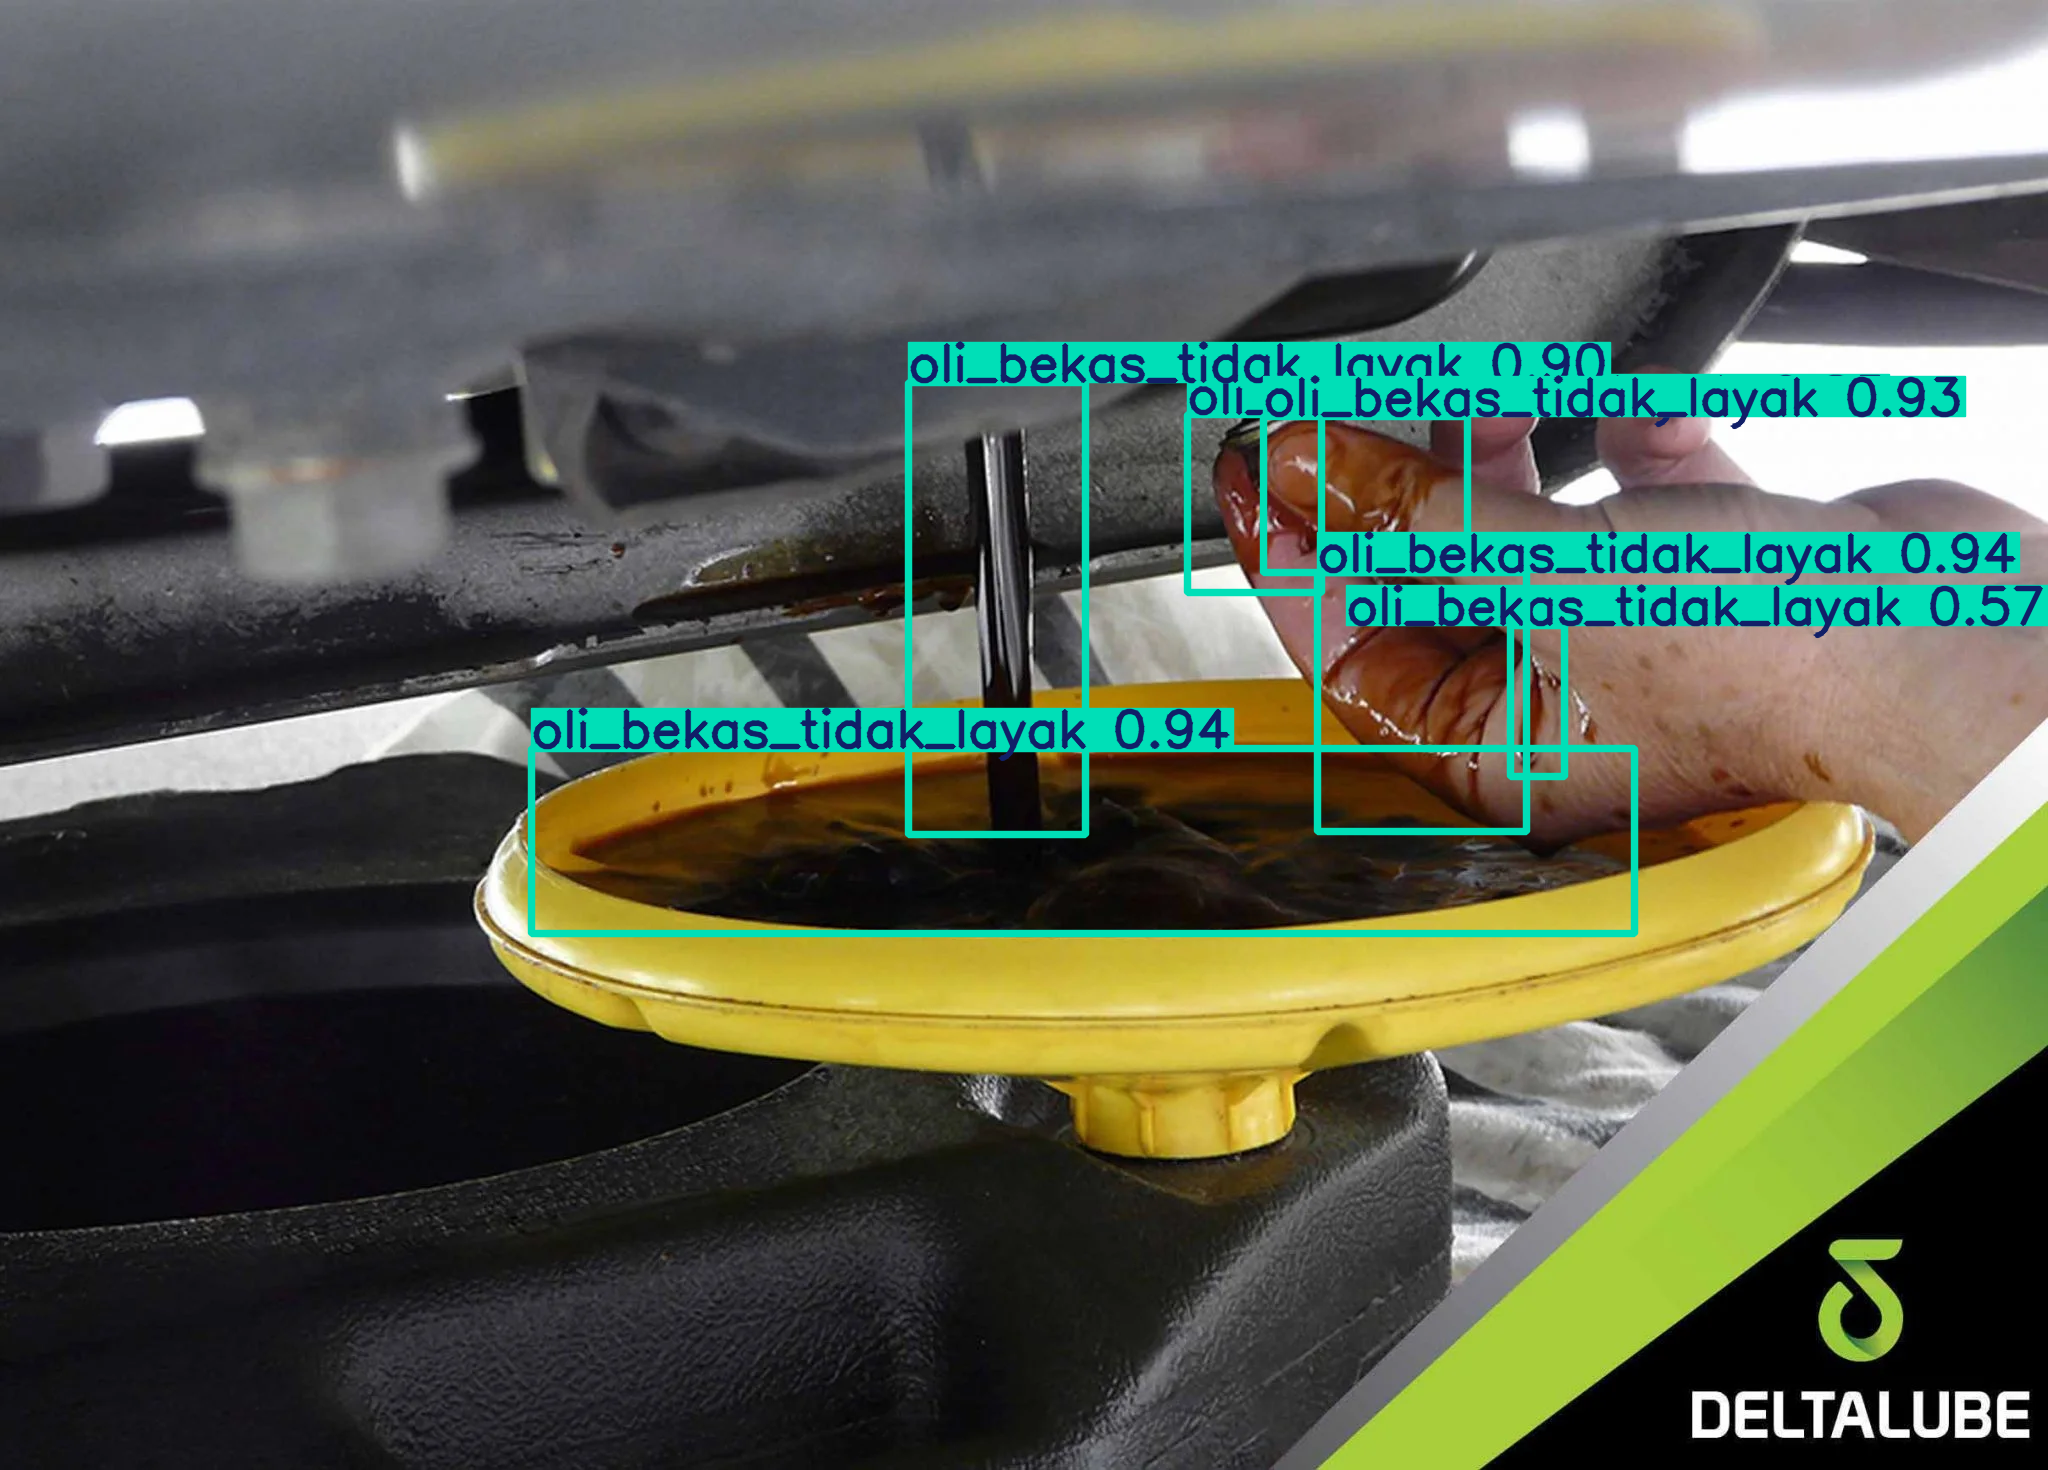

In [ ]:
# Sel Kode 5: Uji Coba Deteksi

# Path ke model terbaik
# path_to_best_model = 'runs/detect/oli_yolov8_training_hasil/weights/best.pt' # Sudah didefinisikan sebelumnya

# Muat model
# model_terlatih = YOLO(path_to_best_model) # Sudah dimuat sebelumnya

model_terlatih = YOLO(path_to_best_model)

# Path ke gambar yang ingin diuji (unggah gambar ke Colab atau gunakan URL)
# Contoh: unggah file 'test_image.jpg' ke root direktori Colab
# path_gambar_uji = 'test_image.jpg'
# Atau gunakan URL:
path_gambar_uji = 'https://www.deltalube.com/wp-content/uploads/2020/09/oli-transmisi-1-2048x1470.jpg.webp' # Ganti dengan URL gambar oli

# Lakukan prediksi
results_prediksi = model_terlatih.predict(source=path_gambar_uji, save=True, conf=0.5) # save=True akan menyimpan gambar hasil deteksi

# Hasil prediksi akan disimpan di 'runs/detect/predict/' (atau subfolder yang sesuai)
# Anda bisa menampilkan hasilnya juga
for r in results_prediksi:
    r.show() # Menampilkan gambar dengan bounding box di output Colab
    # print(r.boxes) # Informasi bounding box, kelas, dan confidence

In [ ]:
# Sel Kode 6: Mengunduh Model .pt

from google.colab import files

# Path ke model terbaik yang ingin diunduh
path_model_di_colab = 'runs/detect/oli_yolov8_training_hasil/weights/best.pt' # Sesuaikan jika nama folder berbeda

# Cek apakah file ada sebelum mencoba mengunduh
if os.path.exists(path_model_di_colab):
    files.download(path_model_di_colab)
    print(f"File '{os.path.basename(path_model_di_colab)}' sedang diunduh...")
else:
    print(f"ERROR: File model tidak ditemukan di path: {path_model_di_colab}")
    print("Pastikan pelatihan telah selesai dan path sudah benar.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File 'best.pt' sedang diunduh...
